## Proyecto

SEMINARIO DE SOLUCION DE PROBLEMAS DE INTELIGENCIA ARTIFICIAL I

Vázquez Pérez Ignacio David

218292866

Ingeniería en computación

------------------------------------------

Resolver un problema de la vida cotidiana o de interés general con alguno de los algoritmos revisados en clase.
### Problemática seleccionada:

La problemática seleccionada es encontrar el camino más corto en un grafo ponderado con 100 nodos.

### El algoritmo elegido:

Se ha elegido utilizar un algoritmo genético para resolver este problema. El algoritmo genético será utilizado para encontrar el camino más corto entre dos nodos en el grafo.

### Cómo se resolvió el problema por medio de un algoritmo evolutivo:

- Inicialización de la población: Se crea una población inicial de caminos aleatorios que van desde el nodo de inicio hasta el nodo de destino.
- Función de aptitud: Se evalúa la aptitud de cada camino en la población utilizando la longitud del camino como función de aptitud. Cuanto menor sea la longitud del camino, mejor será su aptitud.
- Selección: Se seleccionan dos padres de la población utilizando selección de torneo.
- Cruce: Se realiza el cruce entre los padres seleccionados para producir dos descendientes.
- Mutación: Se aplica una mutación aleatoria a los descendientes.
- Reemplazo: Se reemplazan los padres menos aptos por los nuevos descendientes.
- Iteración: Se repiten los pasos 3-6 durante un número fijo de generaciones.
- Resultado: Al finalizar el algoritmo, se selecciona el camino más corto encontrado en la última generación como solución al problema.

### Resultados obtenidos:

Se obtuvo un camino más corto entre dos nodos en el grafo ponderado con 100 nodos utilizando el algoritmo genético. La longitud del camino encontrado fue registrada.

In [12]:
import random
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
def create_population(graph, population_size):
    population = []
    for _ in range(population_size):
        path = random.sample(graph.nodes(), len(graph))
        population.append(path)
    return population

def fitness(graph, path):
    total_distance = 0
    for i in range(len(path) - 1):
        if graph.has_edge(path[i], path[i+1]):  # Verificar si la arista existe
            total_distance += graph[path[i]][path[i+1]]['weight']
        else:
            return float('inf')  # Si la arista no existe, retornar un valor infinito
    return total_distance

def selection(population, scores):
    selected_indices = random.sample(range(len(population)), 2)
    return [population[selected_indices[0]], population[selected_indices[1]]]

def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + [node for node in parent2 if node not in parent1[:crossover_point]]
    child2 = parent2[:crossover_point] + [node for node in parent1 if node not in parent2[:crossover_point]]
    return child1, child2

def mutate(path):
    mutation_point1, mutation_point2 = random.sample(range(len(path)), 2)
    path[mutation_point1], path[mutation_point2] = path[mutation_point2], path[mutation_point1]
    return path

def genetic_algorithm(graph, population_size, generations):
    population = create_population(graph, population_size)
    for _ in range(generations):
        scores = [fitness(graph, path) for path in population]
        new_population = []
        for _ in range(population_size):
            parent1, parent2 = selection(population, scores)
            child1, child2 = crossover(parent1, parent2)
            if random.random() < 0.1:  # Mutation rate
                child1 = mutate(child1)
            if random.random() < 0.1:
                child2 = mutate(child2)
            new_population.extend([child1, child2])
        population = new_population
    best_path = min(population, key=lambda x: fitness(graph, x))
    return best_path




In [17]:
# Crear un grafo ponderado con 100 nodos
G = nx.Graph()

# Añadir nodos
nodes = list(range(1, 101))
G.add_nodes_from(nodes)

# Añadir aristas con pesos aleatorios
edges = []
for i in range(1, 100):
    for j in range(i + 1, 101):
        weight = random.randint(1, 10)  # Peso aleatorio entre 1 y 10
        edges.append((i, j, weight))

G.add_weighted_edges_from(edges)




In [15]:
# Aplicar algoritmo genético para encontrar el camino más corto
best_path = genetic_algorithm(G, population_size=100, generations=1000)
print("Camino más corto encontrado:", best_path)
print("Distancia:", fitness(G, best_path))

/tmp/ipykernel_18217/2577040328.py:4: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  path = random.sample(graph.nodes(), len(graph))


Camino más corto encontrado: [84, 4, 30, 16, 17, 73, 28, 64, 22, 50, 35, 54, 32, 99, 83, 72, 91, 33, 43, 65, 62, 93, 98, 42, 19, 92, 1, 3, 34, 9, 52, 48, 45, 24, 97, 11, 49, 63, 85, 77, 37, 39, 44, 13, 41, 59, 55, 25, 75, 53, 71, 88, 23, 58, 38, 67, 6, 66, 74, 57, 2, 21, 15, 31, 86, 100, 14, 8, 51, 56, 87, 40, 26, 82, 96, 46, 80, 47, 29, 95, 27, 20, 69, 70, 60, 94, 89, 79, 10, 78, 7, 68, 81, 36, 90, 76, 12, 61, 5, 18]
Distancia: 459


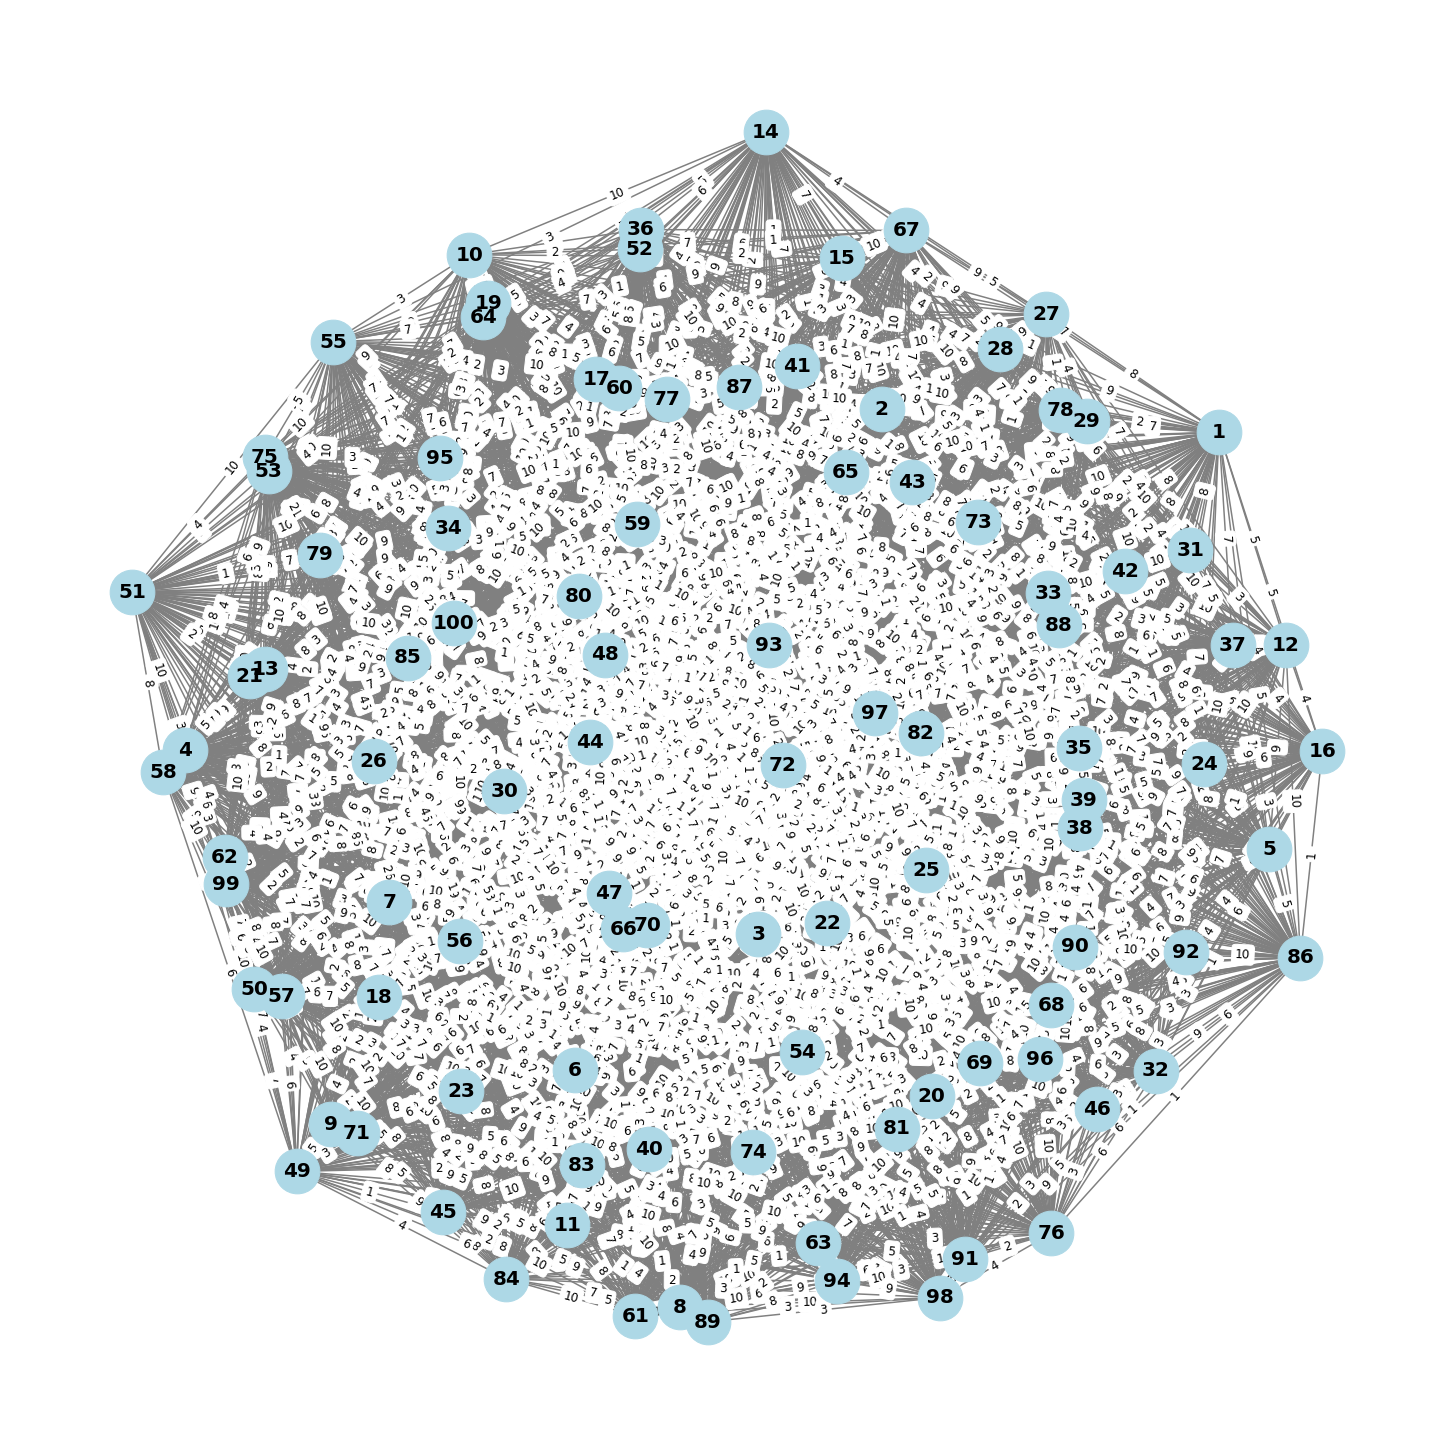

In [16]:
# Visualizar el grafo con etiquetas
plt.figure(figsize=(20, 20))  # Tamaño de la figura
pos = nx.spring_layout(G)  # Posición de los nodos
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=20, font_weight='bold', edge_color='gray', width=1.5)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)  # Etiquetas de las aristas
plt.show()

### Conclusiones

Encontrar la ruta más corta en grafos es una tarea fundamental en muchas aplicaciones, ya que permite descubrir patrones y relaciones entre nodos y aristas que pueden ser traducidos a objetos en una base de datos. Esta técnica es especialmente útil en áreas como el análisis de clientes, la detección de comportamientos anómalos como el fraude, el marketing y la optimización de rutas logísticas.

En el ámbito del análisis de clientes, por ejemplo, encontrar la ruta más corta entre dos nodos puede ayudar a entender cómo los clientes se relacionan entre sí, identificar comunidades dentro de una red social o descubrir patrones de comportamiento de compra. Esto puede ser útil para segmentar a los clientes, personalizar las estrategias de marketing o detectar posibles problemas, como el fraude.

En el marketing, conocer la ruta más corta entre dos puntos puede ser crucial para entender cómo los consumidores interactúan con una marca, identificar puntos de contacto clave o determinar la efectividad de una campaña publicitaria. Esto puede permitir ajustar estrategias de marketing en tiempo real para mejorar la eficiencia y el retorno de la inversión.

En el ámbito de la logística, encontrar la mejor ruta física entre dos ubicaciones puede ayudar a optimizar el transporte de bienes, reducir los costos operativos y mejorar los tiempos de entrega. Esto es fundamental para empresas de transporte, empresas de comercio electrónico y cualquier organización que dependa de la distribución eficiente de productos.

En resumen, la aplicación de algoritmos para encontrar la ruta más corta en grafos es un componente esencial en diversas áreas, ya que permite descubrir información valiosa, identificar patrones y optimizar procesos en una amplia gama de contextos comerciales y de investigación.